In [1]:
import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
# import matplotlib.colors as clrs
# import matplotlib.pyplot as plt
import json
from pprint import pprint
from pandas.io.json import json_normalize

with open('aminer_papers_0_s3.json') as data_file:    
    data0 = json.load(data_file)

In [2]:
with open('aminer_papers_1_s3.json') as data_file:    
    data1 = json.load(data_file)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
df0 = pd.DataFrame.from_dict(json_normalize(data0), orient='columns')
df1 = pd.DataFrame.from_dict(json_normalize(data1), orient='columns')
# df2 = pd.DataFrame.from_dict(json_normalize(data2), orient='columns')
# df3 = pd.DataFrame.from_dict(json_normalize(data3), orient='columns')

df0 = pd.concat([df0, df1])

# df0.head(10)


# Get CS keywords

# df0_new = df0.dropna(subset=['keywords']) #262153
# df0_new.head(20)

In [4]:
cs_papers_number_map = {}
index = 0 # TODO: Deep-walk label starts from '1' afaik
for row in df0.itertuples(): 
    current_paper_id = row[4]
    cs_papers_number_map[current_paper_id] = index
    index = index + 1
cs_papers_number_map 

{u'53e998a3b7602d97020dc7a9': 1492144,
 u'53e99831b7602d9702055068': 962807,
 u'53e99831b7602d9702055069': 962808,
 u'53e99831b7602d9702055066': 962805,
 u'53e99831b7602d9702055067': 962806,
 u'53e99831b7602d9702055064': 962803,
 u'53e99831b7602d9702055065': 962804,
 u'53e99831b7602d9702055062': 962801,
 u'53e99831b7602d9702055063': 962802,
 u'53e99831b7602d9702055060': 962799,
 u'53e99831b7602d9702055061': 962800,
 u'53e998dbb7602d97021164f9': 1716136,
 u'53e997bdb7602d9701fa7f52': 277190,
 u'53e998a3b7602d97020dc7a5': 1492140,
 u'53e998f0b7602d970212f8e0': 1813880,
 u'53e99838b7602d97020613d9': 1010934,
 u'53e99838b7602d97020613d8': 1010933,
 u'53e9991cb7602d9702158929': 1972513,
 u'53e998a3b7602d97020dc7a4': 1492139,
 u'53e998bfb7602d97020f7f7e': 1598697,
 u'53e9981db7602d970203b4ad': 859961,
 u'53e99838b7602d97020613d1': 1010926,
 u'53e99838b7602d97020613d0': 1010925,
 u'53e99838b7602d97020613d3': 1010928,
 u'53e99838b7602d97020613d2': 1010927,
 u'53e99838b7602d97020613d5': 1010930

In [5]:
from collections import defaultdict

# safety checks - 
# cs_dataframe = cs_dataframe.dropna(subset=['id'])
 
citation_graph_adj_list = {}

# cnt = 0
for row in df0.itertuples(): 
    current_paper_id = row[4]
    references = row[14]
    if(type(references) is list): 
        for ref in references:
            # Ignore the paper for which we don't have entry in cs_paper -- not a "cs_paper"
            if (ref in cs_papers_number_map): 
                ref_number = cs_papers_number_map[ref]
#                 print (ref_number)
#     cnt = cnt + 1            
#     if( cnt > 500):
#         break 
                # Putting an edge in the graph (adj_list)
                if (ref_number in citation_graph_adj_list):
                    elements = citation_graph_adj_list[ref_number]
                    elements.add(cs_papers_number_map[current_paper_id])
                    citation_graph_adj_list[ref_number] = elements
                else:    
                    first_element = set([cs_papers_number_map[current_paper_id]])
                    citation_graph_adj_list[ref_number] = first_element
        
citation_graph_adj_list 

{1572864: {786297, 829817, 1868689, 1871089},
 262145: {1005425},
 699051: {27457},
 1310725: {168504,
  320068,
  501542,
  514698,
  826320,
  853608,
  918731,
  943024,
  964048,
  1091434,
  1272901,
  1287437,
  1310725,
  1313963,
  1358359,
  1366199,
  1417043,
  1435913,
  1503853,
  1517567,
  1541720,
  1635327,
  1636644,
  1665188,
  1680421,
  1697002,
  1707481,
  1791598,
  1796178,
  1835273,
  1844529,
  1947891,
  1964451},
 786439: {29880, 100633, 157084, 250560, 305998, 931589, 1192516},
 1310728: {52397, 1175628},
 1310729: {1640819},
 1310730: {453932},
 1791319: {589698},
 1835020: {467237},
 1835021: {1202318},
 1048590: {959954},
 262159: {875866},
 1310736: {1438563},
 1048593: {760910},
 786453: {1194052},
 1572887: {603782, 1526952},
 1494402: {1872988},
 27: {765018},
 1048604: {1048604},
 1048605: {461680},
 30: {1313426},
 1441797: {1615005},
 32: {1042995},
 1485488: {1240253},
 786468: {284625},
 1572901: {1415220},
 1310758: {134004},
 1310759: {3077

In [6]:
len(citation_graph_adj_list)

166291

In [7]:
citation_graph_adj_list_with_all_labels = citation_graph_adj_list.copy()

for key, value in citation_graph_adj_list.items():
    for val in value:
        if val in citation_graph_adj_list:
            continue
        else:
            citation_graph_adj_list_with_all_labels[val] = {}
            
len(citation_graph_adj_list_with_all_labels)

316402

In [8]:
f = open('citation_graph-new.adjlist','w')

for key, value in citation_graph_adj_list_with_all_labels.items():
    line = str(key)
    for x in value:
        line = line + ' ' + str(x)
    f.write(line + '\n')    
    
f.close()

In [26]:
import networkx as nx
G=nx.DiGraph()
for key,value in citation_graph_adj_list.iteritems():
    for v in value:
        G.add_edge(key,v)

In [27]:
print(G.number_of_nodes())
print(G.number_of_edges())

316402
335120


In [37]:
pr = nx.pagerank(G.to_undirected(),max_iter=10000,alpha=0.75,tol=1e-4)

In [38]:
pagerank_df=pd.DataFrame(pr.items(),columns=['vertex_number', 'pagerank'])

In [30]:
citations=G.out_degree()

In [31]:
citations=dict(citations)
citations

{1572864: 4,
 1: 0,
 699051: 1,
 524294: 0,
 262145: 1,
 12: 0,
 1048590: 1,
 15: 0,
 1048593: 1,
 524307: 0,
 1396647: 3,
 1048598: 0,
 1572887: 2,
 1048602: 0,
 27: 1,
 1048604: 1,
 1048605: 1,
 30: 1,
 32: 1,
 1572897: 0,
 34: 0,
 35: 0,
 1048612: 1,
 1572901: 1,
 1048614: 0,
 1929594: 1,
 1048618: 7,
 1048620: 1,
 524335: 0,
 1572912: 0,
 1310728: 2,
 1572914: 0,
 1048627: 0,
 873822: 1,
 1572918: 1,
 1572921: 1,
 1048636: 2,
 1048638: 0,
 1048639: 2,
 1048640: 1,
 1572929: 1,
 1048642: 0,
 1048643: 0,
 1048644: 0,
 524362: 1,
 524364: 2,
 524366: 0,
 524369: 1,
 1572946: 0,
 1572947: 0,
 524372: 2,
 1572878: 3,
 1572951: 1,
 1572952: 1,
 1572953: 0,
 262159: 1,
 1572959: 0,
 1048672: 1,
 1048673: 0,
 524387: 2,
 1048677: 0,
 1048679: 2,
 1572968: 5,
 1572973: 1,
 1572974: 1,
 436925: 0,
 1572976: 0,
 524401: 0,
 524402: 5,
 174782: 6,
 606146: 0,
 1048695: 2,
 1048696: 1,
 1048697: 0,
 1048698: 2,
 1572988: 3,
 524413: 0,
 524416: 1,
 1048706: 0,
 1572996: 0,
 1572999: 2,
 524424:

In [32]:
citation_df=pd.DataFrame(citations.items(),columns=['vertex_number', 'citations'])

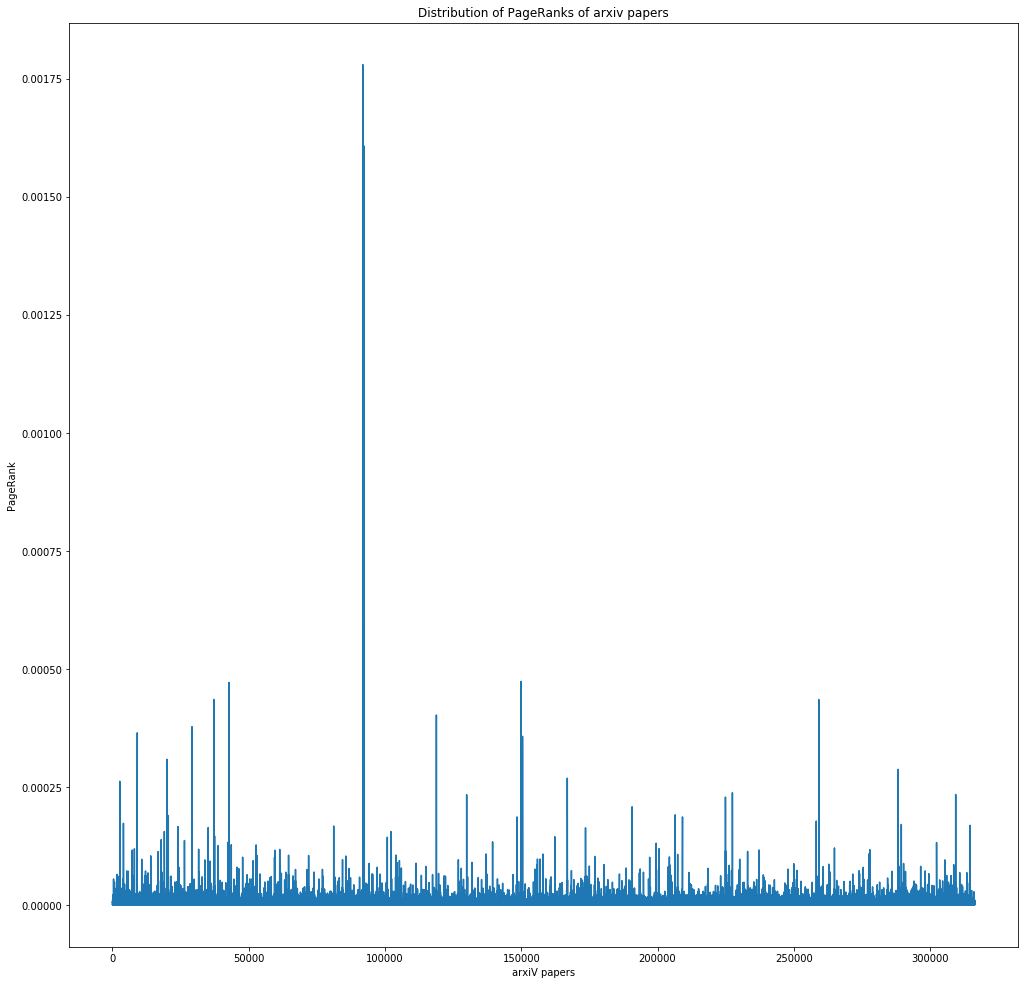

In [39]:
fig = plt.figure()
fig.set_size_inches(17, 17)
plt.plot((pagerank_df['pagerank']))
plt.ylabel("PageRank")
plt.xlabel("arxiV papers")
plt.title("Distribution of PageRanks of arxiv papers")
plt.show()

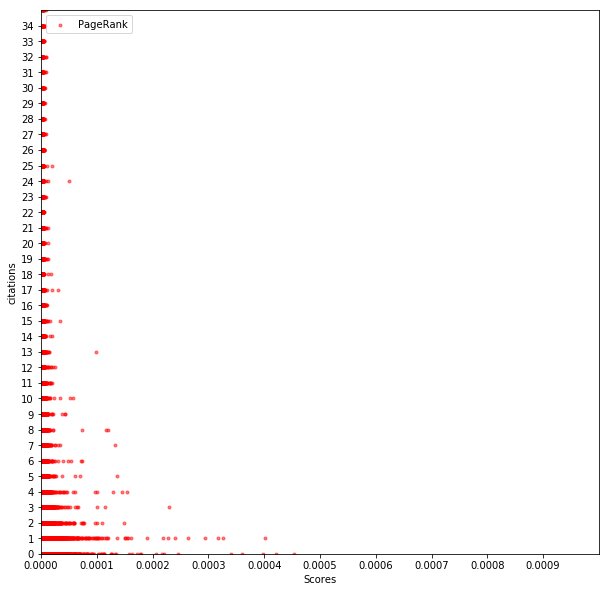

In [17]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(pagerank_df['pagerank'],  citation_df['citations'],c='r', alpha=0.50,marker='.',label='PageRank')
#ax1.scatter(test_score_svr,  citations_test,c='b', alpha=0.50,marker='.',label='Predicted score')
plt.xlabel("Scores")
plt.ylabel("citations")
# plt.yticks(np.arange(0,35, 1))
# plt.xticks(np.arange(0,0.001,0.0001))
# plt.xlim(0,0.001)
# plt.ylim(0, 35)
# plt.legend(loc=2)
plt.show()